#1) Write a function to generate an m+1 dimensional data set, of size n, consisting of m continuous independent variables (X) and one dependent variable (Y) defined as
#$y_i = x_iβ + e$


---



*   $e$ is a Gaussuan distribution with mean 0 and standard deviation (σ), representing the unexplained
variation in Y
*   β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship
between X and Y, and
*   ∀i ∈ [1,n], $x_{i0} = 1$ \\
function should take the following parameters:\\

*   σ:The spread of noise in the output variable
*   n:The size of the data set
*   m:The number of indepedent variables

output from the function should be, \\


*   X:An n x m numpy array of independent variable values (with a 1 in the first column)
*   Y:The n x 1 numpy array of output values
*   β: The random coefficients used to generatre Y from X




---




In [2]:
import numpy as np

def generate_dataset(sigma, n, m):
    X = np.random.randn(n, m)
    true_beta = np.random.randn(m + 1, 1)
    X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))
    Y = np.dot(X_with_intercept, true_beta) + np.random.normal(loc=0, scale=sigma, size=(n, 1))
    return X, Y, true_beta

# Q2) Write a function that learns the parameters of a linear regression line given inputs


---


*   X:An n  m numpy array of independent variable values

*   Y:The n  1 numpy array of output values
*   κ:the number of iteractions (epochs)


*   τ:the threshold on change in Cost function value from the previous to current iteration
*   λ:the learning rate for Gradient Descent \\

The function should implement the Gradient Descent algorithm as discussed in class that initialises β with
random values and then updates these values in each iteraction by moving in the the direction defined by
the partial derivative of the cost function with respect to each of the coefficients. The function should use
only one loop that ends after a number of iterations (κ) or a threshold on the change in cost function value
(τ). \\
The output should be an m + 1 dimensional vector of coefficients and the final cost function value


---



In [3]:
def linear_regression_gradient_descent(X, Y, kappa, tau, lamda):
    m = X.shape[1]
    if X.shape[1] == m:
        X = np.hstack((np.ones((X.shape[0], 1)), X))
    m = X.shape[1]
    beta = np.random.randn(m, 1)
    prev_cost = np.inf

    for epoch in range(kappa):
        Y_pred = np.dot(X, beta)
        error = Y_pred - Y
        gradient = np.dot(X.T, error)
        beta -= lamda * gradient
        cost = np.mean((error) ** 2)
        if abs(cost - prev_cost) < lamda:
            break

        prev_cost = cost

    return beta, cost



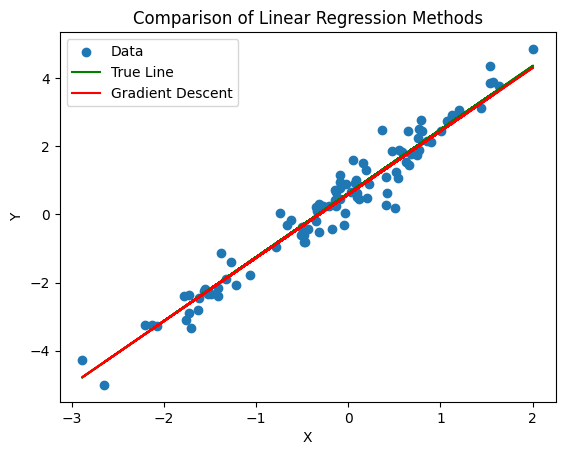

In [4]:

sigma = 0.4
n = 100
m = 1
X, Y, true_beta = generate_dataset(sigma, n, m)
kappa = 1000
tau = 1e-6
lamda = 0.0001


beta_gd, final_cost = linear_regression_gradient_descent(X, Y, kappa, tau,lamda)
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(X, Y, label='Data')
plt.plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), true_beta), color='green', label='True Line')
plt.plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), beta_gd), color='red', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Regression Methods')
plt.legend()
plt.show()

#Q3) Create a report investigating how differen values of n and σ impact the ability for your linear regression function to learn the coefficients, β, used to generate the output vector Y .

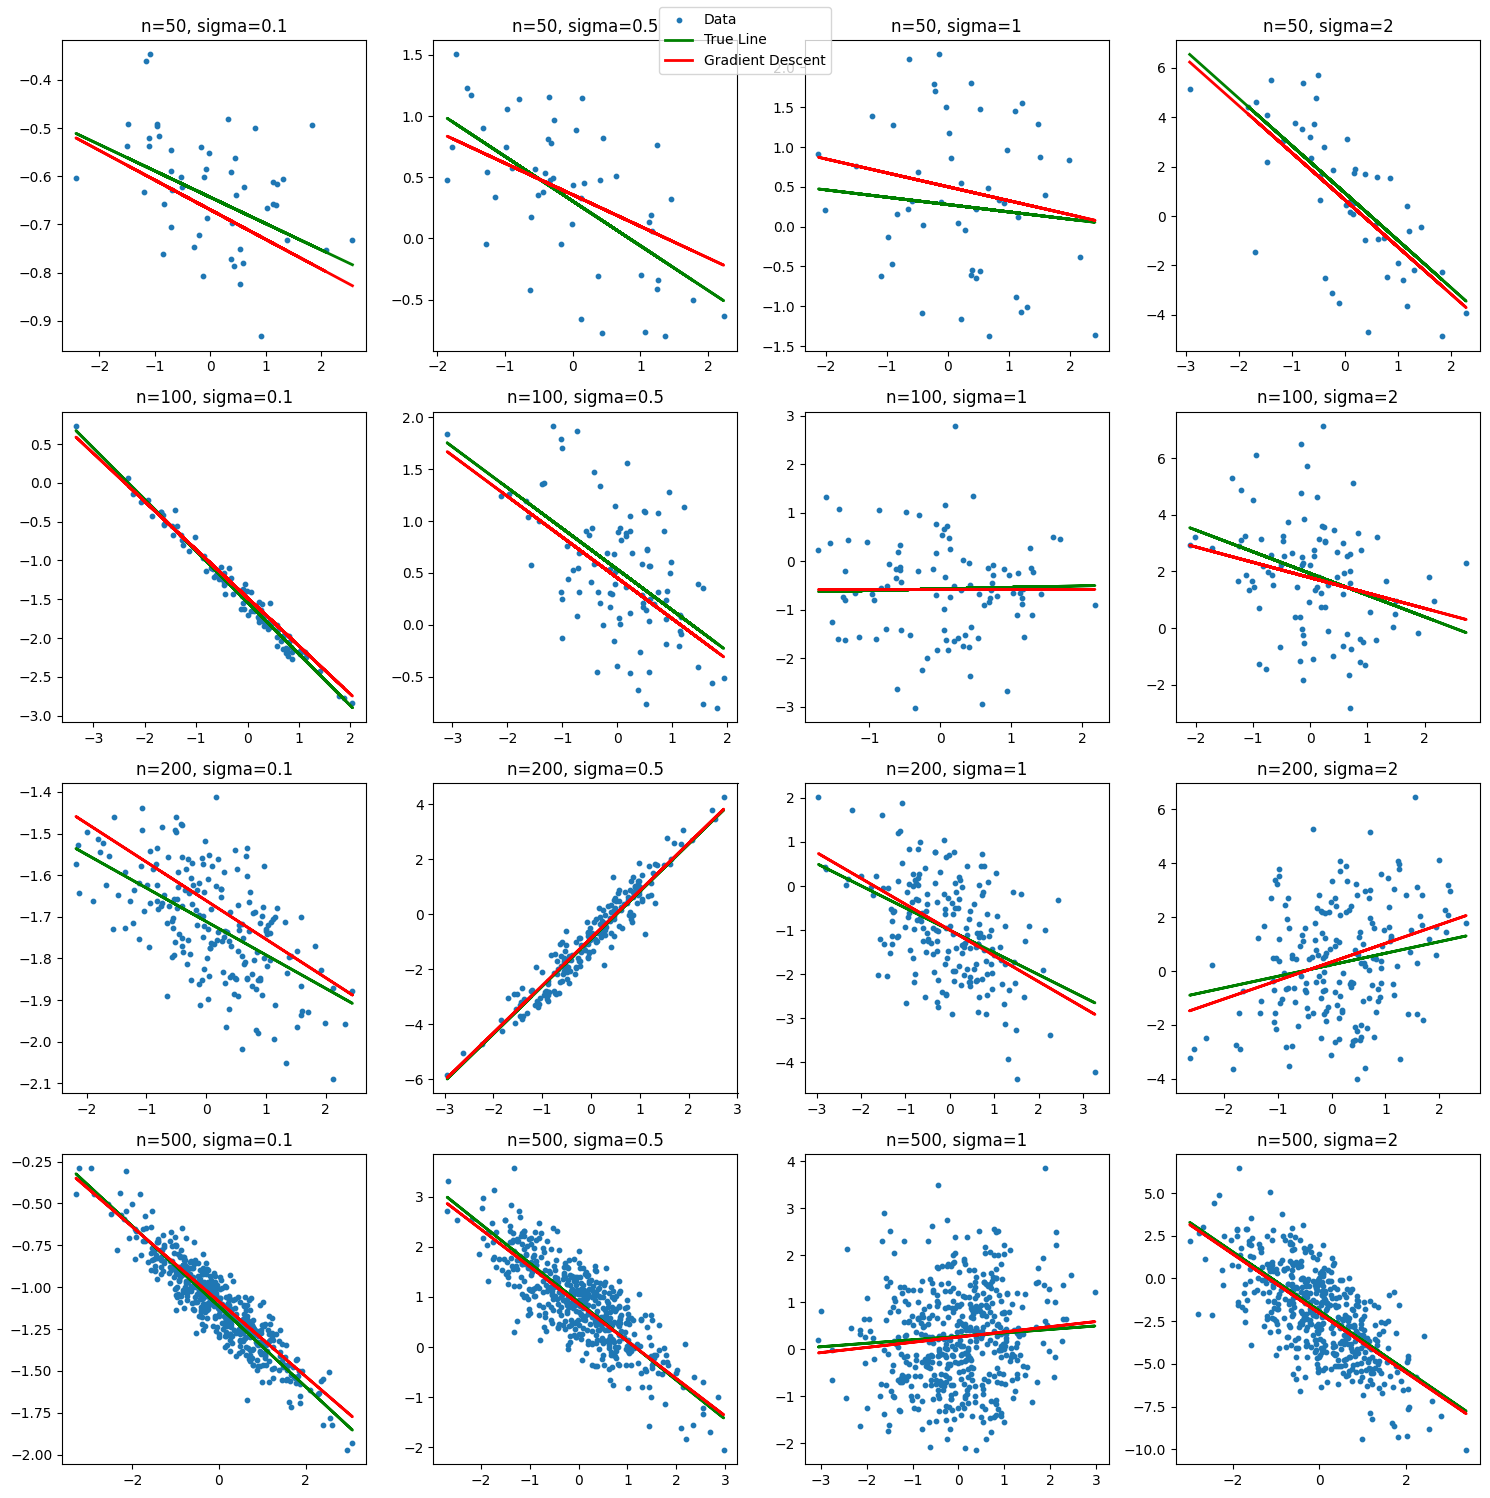

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_values = [50, 100, 200, 500]
sigma_values = [0.1, 0.5, 1, 2]
fig, axs = plt.subplots(len(n_values), len(sigma_values), figsize=(15, 15))


for i, n in enumerate(n_values):
    for j, sigma in enumerate(sigma_values):
        X, Y, true_beta = generate_dataset(sigma, n, m)
        beta_gd, final_cost = linear_regression_gradient_descent(X, Y, kappa,tau,lamda)

        # Scatter plot
        axs[i, j].scatter(X, Y, label='Data', s=10)
        axs[i, j].plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), true_beta), color='green', label='True Line', linewidth=2)
        axs[i, j].plot(X, np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), beta_gd), color='red', label='Gradient Descent', linewidth=2)
        axs[i, j].set_title(f'n={n}, sigma={sigma}')

handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.tight_layout()
plt.show()


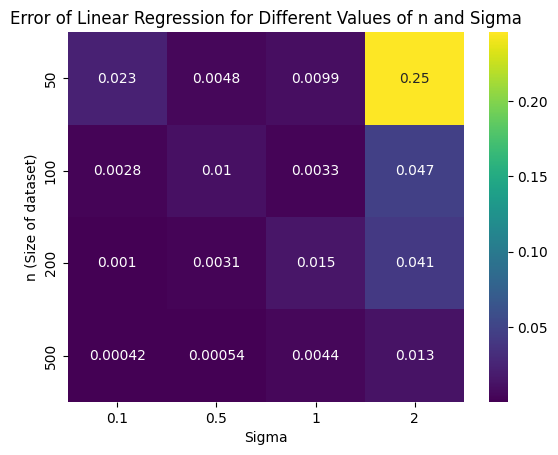

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


n_values = [50, 100, 200, 500]
sigma_values = [0.1, 0.5, 1, 2]
errors = np.zeros((len(n_values), len(sigma_values)))
for i, n in enumerate(n_values):
    for j, sigma in enumerate(sigma_values):
        X, Y, true_beta = generate_dataset(sigma, n, m)
        beta_gd, final_cost = linear_regression_gradient_descent(X, Y,kappa,tau,lamda)
        error = np.mean((true_beta - beta_gd)**2)
        errors[i, j] = error

# Create a heatmap
sns.heatmap(errors, annot=True, xticklabels=sigma_values, yticklabels=n_values, cmap='viridis')
plt.xlabel('Sigma')
plt.ylabel('n (Size of dataset)')
plt.title('Error of Linear Regression for Different Values of n and Sigma')
plt.show()


#Report;


*   Here we can observe that as dataset size(n) increases the error of linear regression decreases.The error decreases across all Sigma values. This suggests that larger sample sizes lead to more accurate linear regression models.
*  The lowest error is observed at n=500 and Sigma=0.1. This combination of parameters might yield the most accurate linear regression model according to the given dataset.
* For a given n, the larger value of σ, larger the error is. This indicates that a lower standard deviation (σ) results in a lower error, hence more precise models.

